# Manual implementation of a simple neural network

This simple neural network is built without using frameworks like Tensorflow, Keras. We use the concept of lists in python to stores the weights and variables of the equation and use the post order binary tree traversal algorithm to form the equation.  


In [1]:
import numpy as np

## Graph
The neural network is represented as a graph which consists of nodes. It is characterized by 3 parameters:operations,variables,weights.

Equation: z = ax + b
where, multiplication and addition are operations; x is a variable; a and b are weights.

In [2]:
class Graph():
    
    
    def __init__(self):
        
        self.operations = []
        self.weights = []
        self.variables = []
        
    def set_as_default(self):
        
        #Sets this Graph instance as the Global Default Graph
        global _default_graph
        _default_graph = self

## Operations

An operation is a node in a graph. This is an abstract class that is inherited by other class which define operations like addition, multiplication, matrix multiplication etc. The operation is appended to the list of operations in the currently active default graph.

In [3]:
class Operation():
   
    def __init__(self, input_nodes = []):
        
        self.input_nodes = input_nodes # The list of input nodes
        self.output_nodes = [] # List of nodes consuming this node's output
        
        # For every node in the input, we append this operation (self) to the list of consumers of the input nodes
        for node in input_nodes:
            node.output_nodes.append(self)
        
        # There is a global default graph to which the operations are appended 
        _default_graph.operations.append(self)
  
    def compute(self):
        """ 
        Overwritten by child classes which perform specific operations.
        """
        pass

In [4]:
class add(Operation):
    
    def __init__(self, m, n):
         
        super().__init__([m, n])

    def compute(self, m_var, n_var):
         
        self.inputs = [m_var, n_var]
        return m_var + n_var

In [5]:
class multiply(Operation):
     
    def __init__(self, m, n):
        
        super().__init__([m, n])
    
    def compute(self, m_var, n_var):
         
        self.inputs = [m_var, n_var]
        return m_var * n_var

In [6]:
class matrix_multiply(Operation):
     
    def __init__(self, m, n):
        
        super().__init__([m, n])
    
    def compute(self, mat1, mat2):
         
        self.inputs = [mat1,mat2]
        return mat1.dot(mat2)

## Variables
 This is a node that needs to be provided a value for computing the output in the graph.

In [10]:
class Variable():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.variables.append(self)

## Weights
These are the values assigned to the coefficients of the equations.

In [9]:
class Weight():
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.weights.append(self)

## Traversal of operation nodes
Post order traversal is used to form perform the computation such that ax is computed first followed by (ax)+b.

In [7]:
def traverse_postorder(operation):
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

## Session
The neural network is run in this module. We define the run method which takes the operation to be computed and a dictionary mapping variables to input values(value to be assigned to x).  

In [8]:
class Session:
    
    def run(self, operation, feed_dict = {}):
                
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Variable:
                
                node.output = feed_dict[node]
                
            elif type(node) == Weight:
                
                node.output = node.value
                
            else: # it's of type Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]

                # the "*" is used since the size of node.inputs is arbitrary until previous statement runs 
                node.output = node.compute(*node.inputs)
                
            # To convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the value of requested node 
        return operation.output


## Solving the equation
A graph is created and nodes are added to it.

In [11]:
#create a graph
g = Graph()

#set the graph as default/global,i.e, all nodes get added to this graph
g.set_as_default()

z = ax + b ==> z =10x + 5

In [12]:
a = Weight(10)
b = Weight(5)
x = Variable()

#operation1
y= multiply(a,x)
#operation2
z=add(y,b)

A session is created to run the graph 

In [13]:
sess = Session()

In [14]:
# assign a value to x
i=int(input("Enter a value for x: "))
# perform the operations to obtain result
result = sess.run(operation=z,feed_dict={x:i})
print(result)

Enter a value for x: 3
35


A matrix operation


In [15]:
g = Graph()

g.set_as_default()

a = Weight([[10,20],[30,40]])
b = Weight([1,1])

x = Variable()

y = matrix_multiply(a,x)

z = add(y,b)

In [16]:
sess = Session()
i=int(input("Enter a value for x: "))
result = sess.run(operation=z,feed_dict={x:i})
print(result)

Enter a value for x: 3
[[ 31  61]
 [ 91 121]]


# A simple classifier 

### Activation functions

#### Sigmoid function

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Sigmoid Operation
class Sigmoid(Operation):
 
    def __init__(self, z):

        # a is the input node
        super().__init__([z])

    def compute(self, z_val):
        
        return 1/(1+np.exp(-z_val))

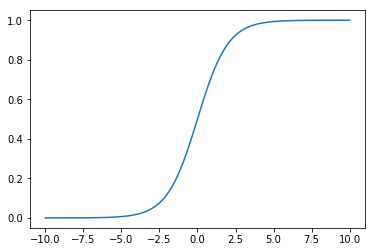

In [23]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y)

#### ReLU function

In [22]:
#ReLU operation
class Relu(Operation):
 
    
    def __init__(self, z):

        # a is the input node
        super().__init__([z])

    def compute(self, z_val):
        return np.maximum(z_val,0)

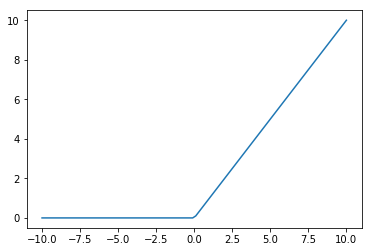

In [21]:
x = np.linspace(-10,10,100)
y = np.maximum(x,0)

plt.plot(x,y)

#### Hyperbolic tangent


In [20]:
#tanh operation
class Tanhyp(Operation):
 
    
    def __init__(self, z):

        # a is the input node
        super().__init__([z])

    def compute(self, z_val):
        return np.tanh(z_val)

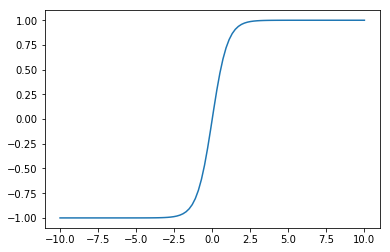

In [19]:
x = np.linspace(-10,10,100)
y = np.tanh(x)

plt.plot(x,y)

### Implementation


$$ w^Tx + b = 0 $$

$$   \Big(1, 1\Big)f - 5 = 0 $$

$$ 
\begin{pmatrix} 
1 , 1
\end{pmatrix} 
\begin{pmatrix} 
4 \\
12
\end{pmatrix} + 5 =  $$

In [24]:
g = Graph()
g.set_as_default()
x = Variable()
w = Weight([1,1])
b = Weight(-5)
z = add(matrix_multiply(w,x),b)

In [25]:
#using sigmoid
a = Sigmoid(z)
sess = Session()
sess.run(operation=a,feed_dict={x:[4,12]})

0.999983298578152

In [27]:
#using Relu
a = Relu(z)
sess = Session()
sess.run(operation=a,feed_dict={x:[4,12]})

11

In [26]:
#using hypebolic tan
a = Tanhyp(z)
sess = Session()
sess.run(operation=a,feed_dict={x:[4,12]})

0.9999999994421064